# ML Engineer Task

In [81]:
# Importing all Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import folium

NOTE :- Because the original dataset was having about 7M+ Records then while working with the this large dataset my system was not comptiable and also it was a time taking process so i am going to work with the Chunk of data with 100000 records

In [2]:
# Chunking the Data or Loading the Data
chunk_size = 100000
sample_df = pd.read_csv(r"C:\Users\jayas\OneDrive\Desktop\New folder\us_assignment.csv", nrows=chunk_size)

In [3]:
sample_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
sample_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,100000.000000,100000.000000,100000.000000,0.0,0.0,100000.000000,98409.000000,4322.000000,98144.000000,98708.000000,98154.000000,76180.000000,7368.000000
mean,2.448120,35.630369,-119.322756,NaN,NaN,0.011345,66.641262,48.845812,59.794170,29.961021,9.338639,8.044165,0.025786
std,0.499931,2.101259,3.663525,NaN,NaN,0.262244,12.703846,19.898270,23.184442,0.275672,1.885828,4.298926,0.051695
min,1.000000,32.542587,-123.813927,NaN,NaN,0.000000,3.200000,-8.400000,4.000000,2.980000,0.100000,0.000000,0.000000
25%,2.000000,33.957775,-121.828468,NaN,NaN,0.000000,57.900000,37.100000,43.000000,29.890000,10.000000,4.600000,0.000000
50%,2.000000,34.168579,-118.384232,NaN,NaN,0.000000,66.000000,42.500000,62.000000,29.970000,10.000000,6.900000,0.000000
75%,3.000000,37.776682,-117.916023,NaN,NaN,0.010000,75.000000,63.000000,78.000000,30.060000,10.000000,10.400000,0.030000
max,4.000000,41.428753,-81.550728,NaN,NaN,51.130000,114.100000,107.000000,100.000000,33.040000,80.000000,241.700000,0.550000


In [5]:
print("Dataset Shape:", sample_df.shape)
print("Columns:\n", sample_df.columns)

Dataset Shape: (100000, 46)
Columns:
 Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [6]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

In [7]:
sample_df.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  100000
End_Lng                  100000
Distance(mi)                  0
Description                   0
Street                        0
City                          1
County                        0
State                         0
Zipcode                       7
Country                       0
Timezone                      7
Airport_Code                  7
Weather_Timestamp          1054
Temperature(F)             1591
Wind_Chill(F)             95678
Humidity(%)                1856
Pressure(in)               1292
Visibility(mi)             1846
Wind_Direction             1064
Wind_Speed(mph)           23820
Precipitation(in)         92632
Weather_Condition          1604
Amenity                       0
Bump                          0
Crossing

In [8]:
missing_data = sample_df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_data)

Missing Values:
 End_Lat                  100000
End_Lng                  100000
Wind_Chill(F)             95678
Precipitation(in)         92632
Wind_Speed(mph)           23820
Humidity(%)                1856
Visibility(mi)             1846
Weather_Condition          1604
Temperature(F)             1591
Pressure(in)               1292
Wind_Direction             1064
Weather_Timestamp          1054
Airport_Code                  7
Zipcode                       7
Timezone                      7
Sunrise_Sunset                1
Civil_Twilight                1
Nautical_Twilight             1
Astronomical_Twilight         1
City                          1
Country                       0
Junction                      0
Severity                      0
Start_Time                    0
End_Time                      0
Turning_Loop                  0
Traffic_Signal                0
Traffic_Calming               0
Stop                          0
Station                       0
Roundabout             

Droping the null values which are having the more than 50% missing values

In [9]:
threshold = len(sample_df) * 0.5
sample_df_cleaned = sample_df.dropna(axis=1, thresh=threshold)
sample_df_cleaned.shape

(100000, 42)

In [10]:
sample_df_cleaned.isnull().sum()*100/sample_df_cleaned.shape[0]

ID                        0.000
Source                    0.000
Severity                  0.000
Start_Time                0.000
End_Time                  0.000
Start_Lat                 0.000
Start_Lng                 0.000
Distance(mi)              0.000
Description               0.000
Street                    0.000
City                      0.001
County                    0.000
State                     0.000
Zipcode                   0.007
Country                   0.000
Timezone                  0.007
Airport_Code              0.007
Weather_Timestamp         1.054
Temperature(F)            1.591
Humidity(%)               1.856
Pressure(in)              1.292
Visibility(mi)            1.846
Wind_Direction            1.064
Wind_Speed(mph)          23.820
Weather_Condition         1.604
Amenity                   0.000
Bump                      0.000
Crossing                  0.000
Give_Way                  0.000
Junction                  0.000
No_Exit                   0.000
Railway 

In [11]:
sample_df_cleaned['Wind_Speed(mph)'].fillna(sample_df_cleaned['Wind_Speed(mph)'].median(),inplace = True)

In [82]:
sample_df_cleaned.isnull().sum()*100/sample_df_cleaned.shape[0]

ID                       0.000000
Source                   0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Street                   0.000000
City                     0.000000
County                   0.000000
State                    0.000000
Zipcode                  0.000000
Country                  0.000000
Timezone                 0.000000
Airport_Code             0.000000
Weather_Timestamp        0.002685
Temperature(F)           0.620184
Humidity(%)              1.044379
Pressure(in)             0.201358
Visibility(mi)           1.108814
Wind_Direction           0.024163
Wind_Speed(mph)          0.000000
Weather_Condition        0.861814
Amenity                  0.000000
Bump                     0.000000
Crossing                 0.000000
Give_Way                 0.000000
Junction      

So we had cleaned all the dataset and there are small missing values percentage while we can drop those or fill them

In [12]:
sample_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   Distance(mi)           100000 non-null  float64
 8   Description            100000 non-null  object 
 9   Street                 100000 non-null  object 
 10  City                   99999 non-null   object 
 11  County                 100000 non-null  object 
 12  State                  100000 non-null  object 
 13  Zipcode                99993 non-null   object 
 14  Country                100000 non-nul

Type Convertion

In [13]:
# Convert to datetime
sample_df_cleaned['Weather_Timestamp'] = pd.to_datetime(sample_df_cleaned['Weather_Timestamp']).sort_values()

In [14]:
sample_df_cleaned['Weather_Timestamp']

0       2016-02-08 05:58:00
1       2016-02-08 05:51:00
2       2016-02-08 06:56:00
3       2016-02-08 07:38:00
4       2016-02-08 07:53:00
                ...        
99995   2016-04-05 15:51:00
99996   2016-04-05 15:53:00
99997   2016-04-05 15:53:00
99998   2016-04-05 15:53:00
99999   2016-04-05 15:45:00
Name: Weather_Timestamp, Length: 100000, dtype: datetime64[ns]

In [15]:
complete_time_range = pd.date_range(start=sample_df_cleaned['Weather_Timestamp'].min(), end=sample_df_cleaned['Weather_Timestamp'].max(), freq='H')

In [16]:
# Dropping the Duplicates
sample_df_cleaned = sample_df_cleaned.drop_duplicates(subset='Weather_Timestamp', keep='first')

In [17]:
#Reindexing the values
df = sample_df_cleaned.set_index('Weather_Timestamp').reindex(complete_time_range)

In [18]:
# Filling the missing values by using the the backword and forword fill method
df =df.ffill()
df = df.bfill()

In [19]:
# Finally reindexing and Renaming the columns
df.reset_index(inplace=True)
df.rename(columns={'index': 'Weather_Timestamp'}, inplace=True)

In [20]:
df.columns

Index(['Weather_Timestamp', 'ID', 'Source', 'Severity', 'Start_Time',
       'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [21]:
df.head()

,Weather_Timestamp,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2016-02-08 05:51:00,A-2,Source2,2.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,...,False,False,False,False,False,False,Night,Night,Night,Day
1,2016-02-08 06:51:00,A-2,Source2,2.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,...,False,False,False,False,False,False,Night,Night,Night,Day
2,2016-02-08 07:51:00,A-6,Source2,3.0,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,...,False,False,False,False,False,False,Day,Day,Day,Day
3,2016-02-08 08:51:00,A-6,Source2,3.0,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,...,False,False,False,False,False,False,Day,Day,Day,Day
4,2016-02-08 09:51:00,A-6,Source2,3.0,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [22]:
df['Humidity(%)'].fillna(df['Humidity(%)'].median(),inplace = True)

In [83]:
df.isnull().sum()*100/df.shape[0]

Severity                  0.0
Start_Lat                 0.0
Start_Lng                 0.0
Distance(mi)              0.0
City                      0.0
County                    0.0
State                     0.0
Temperature(F)            0.0
Humidity(%)               0.0
Pressure(in)              0.0
Visibility(mi)            0.0
Wind_Direction            0.0
Wind_Speed(mph)           0.0
Weather_Condition         0.0
Amenity                   0.0
Bump                      0.0
Crossing                  0.0
Give_Way                  0.0
Junction                  0.0
No_Exit                   0.0
Railway                   0.0
Roundabout                0.0
Stop                      0.0
Traffic_Calming           0.0
Traffic_Signal            0.0
Sunrise_Sunset            0.0
Civil_Twilight            0.0
Nautical_Twilight         0.0
Astronomical_Twilight     0.0
Hour                      0.0
Day                       0.0
Month                     0.0
Day_of_Week               0.0
Severity_L

Now we can see that the dataset has no missing values

In [24]:
df.shape

(8487, 42)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8487 entries, 0 to 8486
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Weather_Timestamp      8487 non-null   datetime64[ns]
 1   ID                     8487 non-null   object        
 2   Source                 8487 non-null   object        
 3   Severity               8487 non-null   float64       
 4   Start_Time             8487 non-null   object        
 5   End_Time               8487 non-null   object        
 6   Start_Lat              8487 non-null   float64       
 7   Start_Lng              8487 non-null   float64       
 8   Distance(mi)           8487 non-null   float64       
 9   Description            8487 non-null   object        
 10  Street                 8487 non-null   object        
 11  City                   8487 non-null   object        
 12  County                 8487 non-null   object        
 13  Sta

In [26]:
# Converting all the objects to the category
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8487 entries, 0 to 8486
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Weather_Timestamp      8487 non-null   datetime64[ns]
 1   ID                     8487 non-null   category      
 2   Source                 8487 non-null   category      
 3   Severity               8487 non-null   float64       
 4   Start_Time             8487 non-null   category      
 5   End_Time               8487 non-null   category      
 6   Start_Lat              8487 non-null   float64       
 7   Start_Lng              8487 non-null   float64       
 8   Distance(mi)           8487 non-null   float64       
 9   Description            8487 non-null   category      
 10  Street                 8487 non-null   category      
 11  City                   8487 non-null   category      
 12  County                 8487 non-null   category      
 13  Sta

# Data Visiluzation

In [ ]:
# Extracting the hour date month from the Weather Timestamp
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])
df['Hour'] = df['Weather_Timestamp'].dt.hour
df['Day'] = df['Weather_Timestamp'].dt.date
df['Month'] = df['Weather_Timestamp'].dt.month

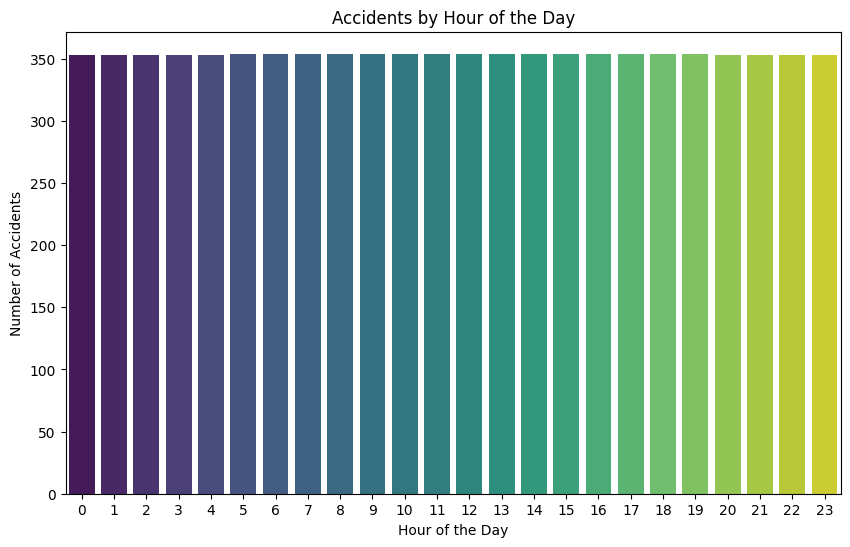

In [90]:
# Accidents by Hour of the Day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hour', palette='viridis')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

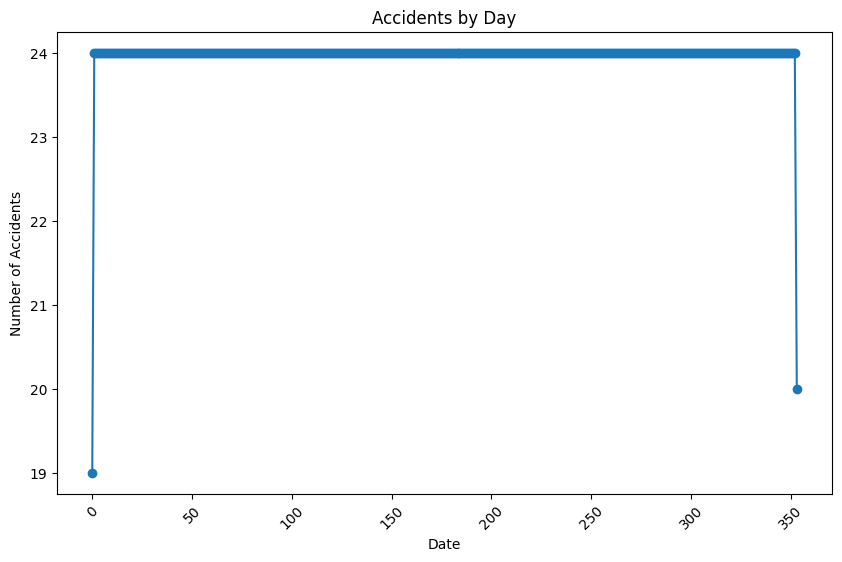

In [97]:
# accidents by day
plt.figure(figsize=(10, 6))
df['Day'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Accidents by Day')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

So we can that the daily average of 25 accidents on happeining

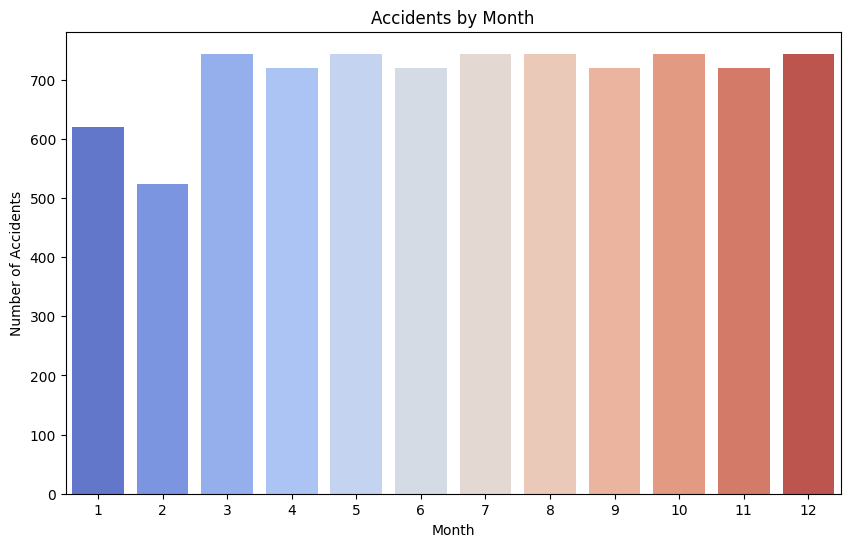

In [31]:
# Accidents by Month
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', palette='coolwarm')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

The Higgest number of Accidents are happened in the March and December month

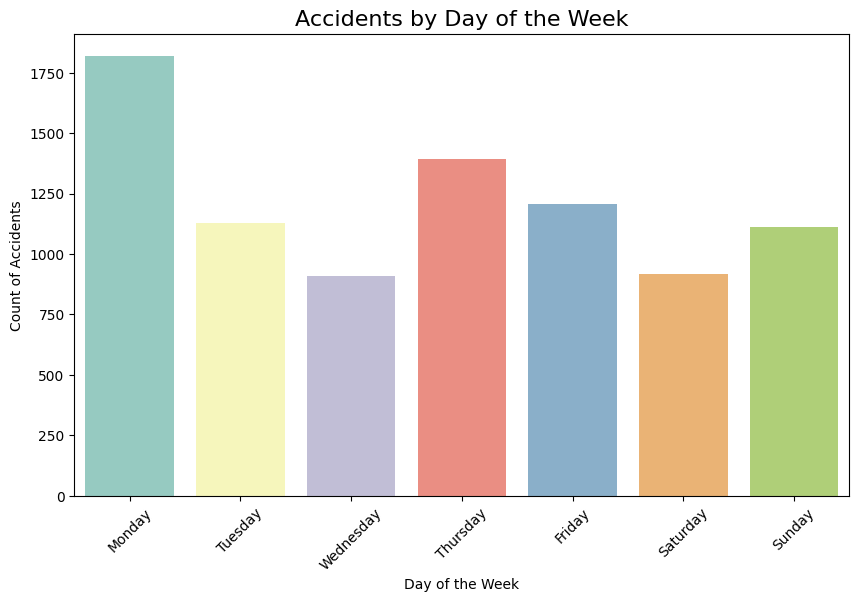

In [32]:
# Accidents based on the week
df['Day_of_Week'] = pd.to_datetime(df['Start_Time']).dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=df, palette='Set3')
plt.title('Accidents by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=45)
plt.show()

Based on the above graph we can see that the Accidents are more Happinieng on the Monday only

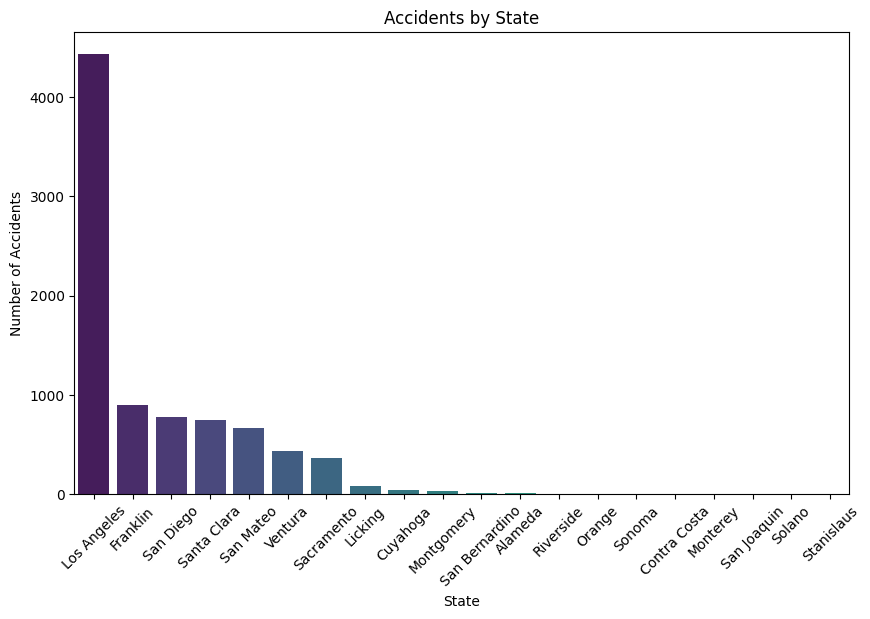

In [33]:
# accidents by state
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='County', palette='viridis', order=df['County'].value_counts().index)
plt.title('Accidents by State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

The more number of Accidents on a state is Los Angeles followed by Franklin

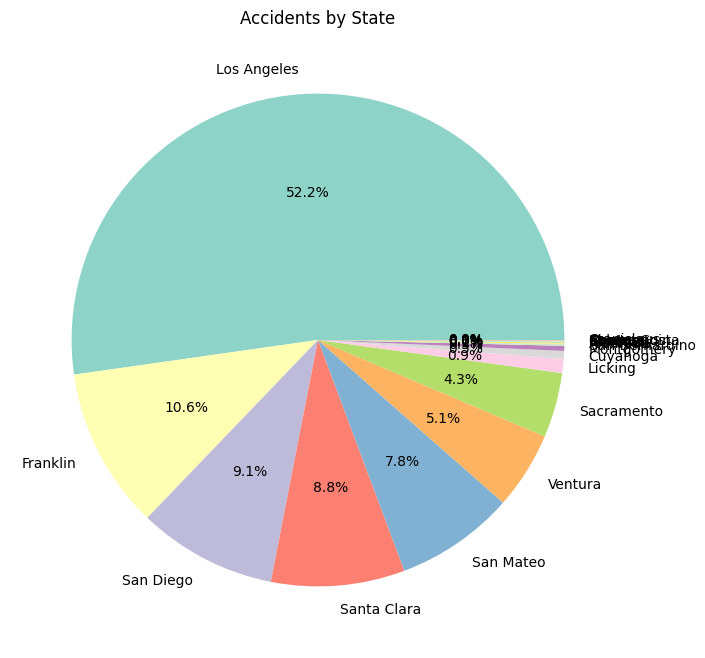

In [34]:
# Pie Chart
accidents_by_country = df['County'].value_counts()
plt.figure(figsize=(8, 8))
accidents_by_country.plot(kind='pie', autopct='%1.1f%%',colors=sns.color_palette("Set3"))
plt.title('Accidents by State')
plt.ylabel('')
plt.show()

In this chart we can see that upto 52.2% of Accidents are happened from the Los Angeles

In [35]:
lat_bins = np.linspace(df['Start_Lat'].min(), df['Start_Lat'].max(), num=100)
lng_bins = np.linspace(df['Start_Lng'].min(), df['Start_Lng'].max(), num=100)

In [36]:
df['lat_bin'] = np.digitize(df['Start_Lat'], lat_bins)
df['lng_bin'] = np.digitize(df['Start_Lng'], lng_bins)


In [37]:
heatmap_data = df.groupby(['lat_bin', 'lng_bin']).size().reset_index(name='count')

In [38]:
heatmap_matrix = heatmap_data.pivot(index='lat_bin', columns='lng_bin', values='count').fillna(0)

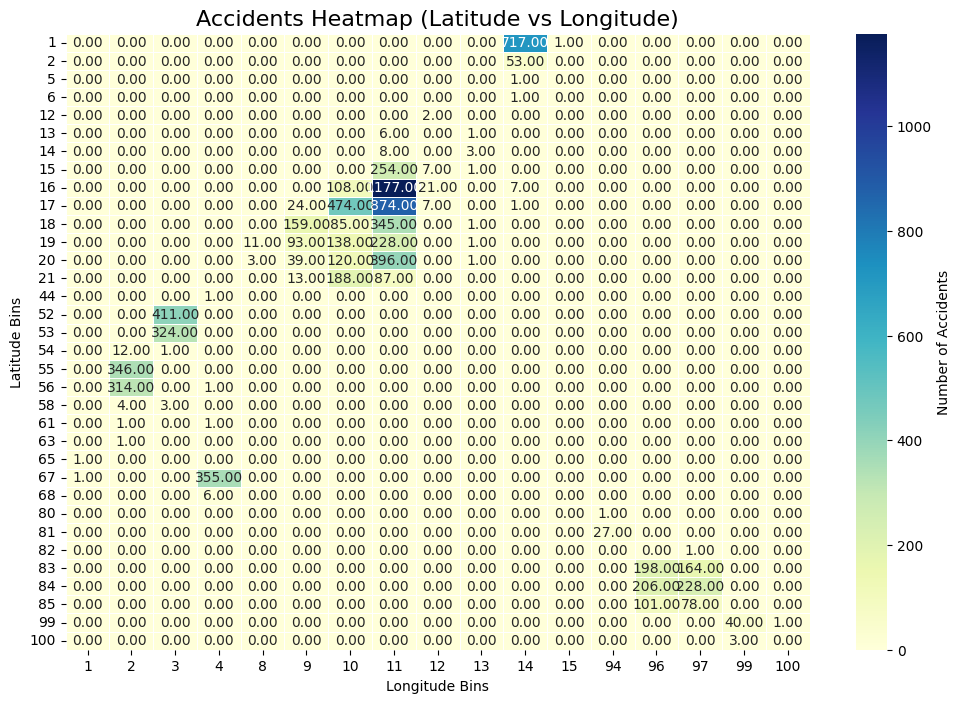

In [103]:
# Accidents based on the Latitude and Longitude
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_matrix, cmap='YlGnBu', cbar_kws={'label': 'Number of Accidents'},fmt='.2f', linewidths=0.5,annot=True)
plt.title('Accidents Heatmap (Latitude vs Longitude)', fontsize=16)
plt.xlabel('Longitude Bins')
plt.ylabel('Latitude Bins')
plt.show()

Corelation betweeen longitude and Latitude bins

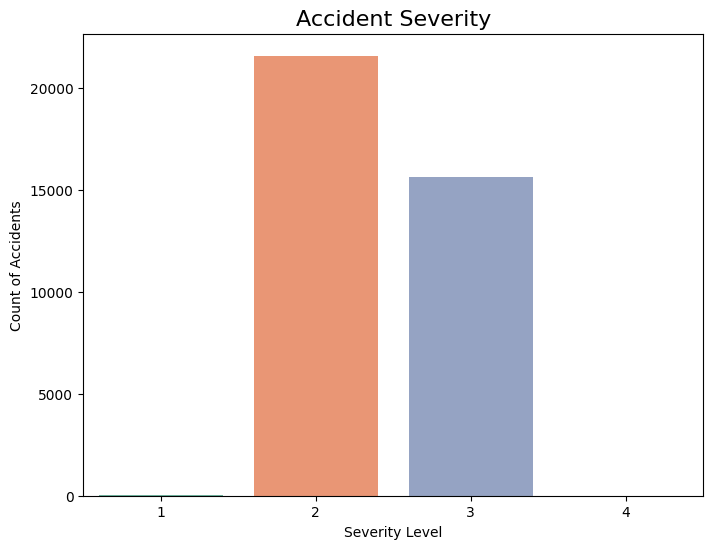

In [101]:
# Based on Accident Severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=sample_df_cleaned, palette='Set2')
plt.title('Accident Severity', fontsize=16)
plt.xlabel('Severity Level')
plt.ylabel('Count of Accidents')
plt.show()

More number of accidents having the Severity level 2

In [41]:
weather_counts = df['Weather_Condition'].value_counts().head(10)

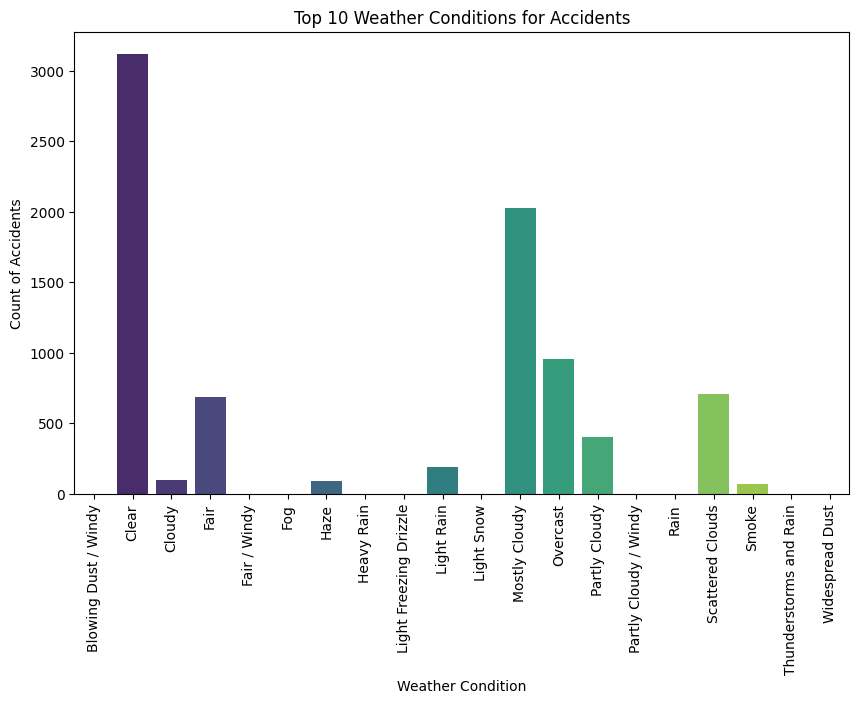

In [42]:
# Based on Weather Condition based on top 10 weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='viridis')
plt.title('Top 10 Weather Conditions for Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=90)
plt.show()

We can see that the weather condition is not a big problem because the more number of accidents takes place on the Clear weather condition only

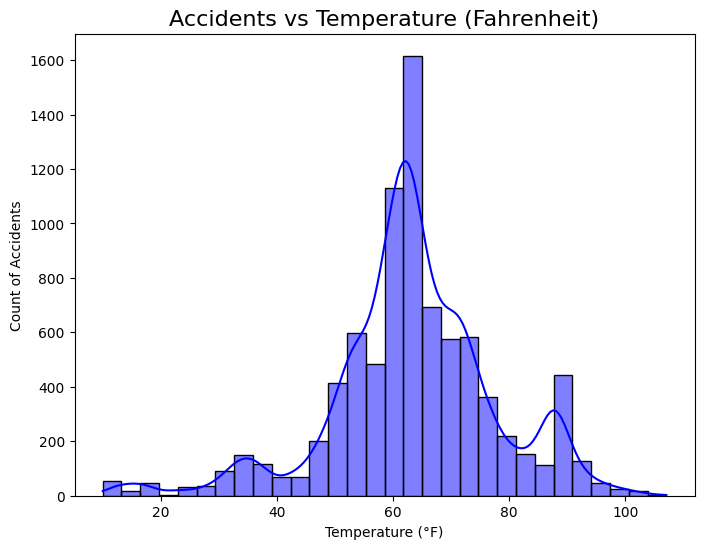

In [43]:
# Accidents based on the Temperature
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature(F)'], bins=30, kde=True, color='blue')
plt.title('Accidents vs Temperature (Fahrenheit)', fontsize=16)
plt.xlabel('Temperature (°F)')
plt.ylabel('Count of Accidents')
plt.show()

We can clearly see that the Temprature control also a crucial factor because we can see that within the high temprature the more number of accidents are taken place

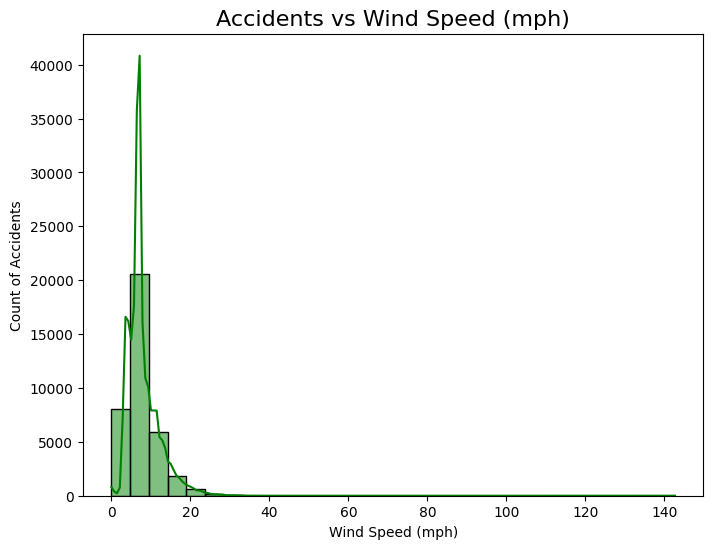

In [44]:
# accidents based on the Wind Speed
plt.figure(figsize=(8, 6))
sns.histplot(sample_df_cleaned['Wind_Speed(mph)'], bins=30, kde=True, color='green')
plt.title('Accidents vs Wind Speed (mph)', fontsize=16)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Count of Accidents')
plt.show()

We can see that the wind speed does not matters while coming to this because the most of the Accidents happen on the normal wind spped only

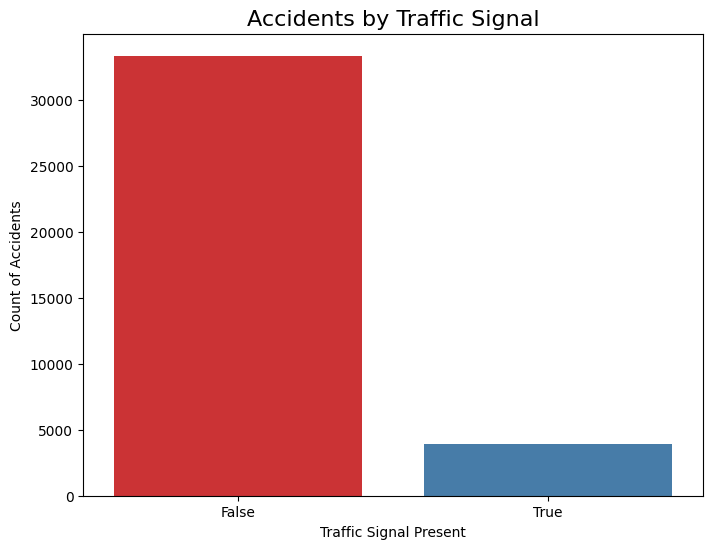

In [46]:
# Based on Traffic Signal
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic_Signal', data=sample_df_cleaned, palette='Set1')
plt.title('Accidents by Traffic Signal', fontsize=16)
plt.xlabel('Traffic Signal Present')
plt.ylabel('Count of Accidents')
plt.show()

Based on the Above data we can see that most of number accidents are happen on the based on the wrong traffic light or traffic signal only

In [47]:
df.columns

Index(['Weather_Timestamp', 'ID', 'Source', 'Severity', 'Start_Time',
       'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Hour',
       'Day', 'Month', 'Day_of_Week', 'lat_bin', 'lng_bin'],
      dtype='object')

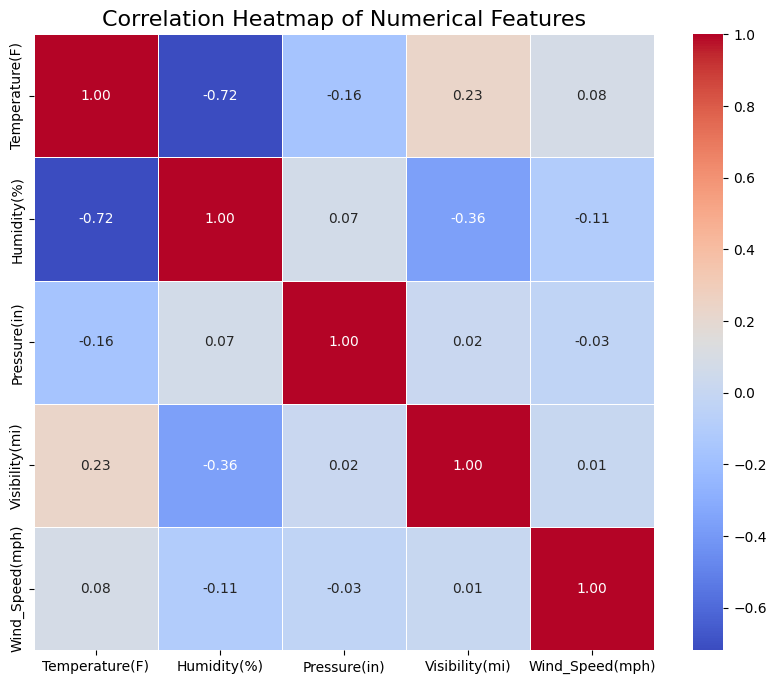

In [48]:
# Relation between Numerical Features
corr = sample_df_cleaned[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

In [49]:
df.columns

Index(['Weather_Timestamp', 'ID', 'Source', 'Severity', 'Start_Time',
       'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Hour',
       'Day', 'Month', 'Day_of_Week', 'lat_bin', 'lng_bin'],
      dtype='object')

In [50]:
df['Source'].value_counts()

Source
Source2    8330
Source3     157
Name: count, dtype: int64

In [51]:
#We will drop the columns which are not required where it will reduce overfitting
df.drop(['lat_bin', 'lng_bin','ID','Zipcode','Timezone','Airport_Code','Source','Description','Street','Weather_Timestamp','Start_Time',
         'End_Time','Turning_Loop','Station','Country',], axis=1, inplace=True)

In [52]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),Humidity(%),Pressure(in),...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Day,Month,Day_of_Week
0,2.0,39.928059,-82.831184,0.01,Reynoldsburg,Franklin,OH,37.9,100.0,29.65,...,False,False,Night,Night,Night,Day,5,2016-02-08,2,Monday
1,2.0,39.928059,-82.831184,0.01,Reynoldsburg,Franklin,OH,37.9,100.0,29.65,...,False,False,Night,Night,Night,Day,6,2016-02-08,2,Monday
2,3.0,40.100590,-82.925194,0.01,Westerville,Franklin,OH,37.9,97.0,29.63,...,False,False,Day,Day,Day,Day,7,2016-02-08,2,Monday
3,3.0,40.100590,-82.925194,0.01,Westerville,Franklin,OH,37.9,97.0,29.63,...,False,False,Day,Day,Day,Day,8,2016-02-08,2,Monday
4,3.0,40.100590,-82.925194,0.01,Westerville,Franklin,OH,37.9,97.0,29.63,...,False,False,Day,Day,Day,Day,9,2016-02-08,2,Monday


In [53]:
df['Severity'].value_counts()

Severity
2.0    4523
3.0    3937
1.0      27
Name: count, dtype: int64

In [104]:
# we will convert all the labels for the classification task
def categorize_severity(severity):
    if severity <= 2:
        return 'Critical'
    elif severity == 3:
        return 'Moderate'
    else:
        return 'Very Critical'

In [55]:
df['Severity_Label'] = df['Severity'].apply(categorize_severity)

# Feature Engineering

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Severity_Label_Encoded'] = le.fit_transform(df['Severity_Label'])

In [57]:
print(df[['Severity', 'Severity_Label', 'Severity_Label_Encoded']])

      Severity Severity_Label  Severity_Label_Encoded
0          2.0       Critical                       0
1          2.0       Critical                       0
2          3.0       Moderate                       1
3          3.0       Moderate                       1
4          3.0       Moderate                       1
...        ...            ...                     ...
8482       3.0       Moderate                       1
8483       3.0       Moderate                       1
8484       2.0       Critical                       0
8485       2.0       Critical                       0
8486       2.0       Critical                       0

[8487 rows x 3 columns]


In [58]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),Humidity(%),Pressure(in),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Day,Month,Day_of_Week,Severity_Label,Severity_Label_Encoded
0,2.0,39.928059,-82.831184,0.01,Reynoldsburg,Franklin,OH,37.9,100.0,29.65,...,Night,Night,Night,Day,5,2016-02-08,2,Monday,Critical,0
1,2.0,39.928059,-82.831184,0.01,Reynoldsburg,Franklin,OH,37.9,100.0,29.65,...,Night,Night,Night,Day,6,2016-02-08,2,Monday,Critical,0
2,3.0,40.100590,-82.925194,0.01,Westerville,Franklin,OH,37.9,97.0,29.63,...,Day,Day,Day,Day,7,2016-02-08,2,Monday,Moderate,1
3,3.0,40.100590,-82.925194,0.01,Westerville,Franklin,OH,37.9,97.0,29.63,...,Day,Day,Day,Day,8,2016-02-08,2,Monday,Moderate,1
4,3.0,40.100590,-82.925194,0.01,Westerville,Franklin,OH,37.9,97.0,29.63,...,Day,Day,Day,Day,9,2016-02-08,2,Monday,Moderate,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8487 entries, 0 to 8486
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Severity                8487 non-null   float64 
 1   Start_Lat               8487 non-null   float64 
 2   Start_Lng               8487 non-null   float64 
 3   Distance(mi)            8487 non-null   float64 
 4   City                    8487 non-null   category
 5   County                  8487 non-null   category
 6   State                   8487 non-null   category
 7   Temperature(F)          8487 non-null   float64 
 8   Humidity(%)             8487 non-null   float64 
 9   Pressure(in)            8487 non-null   float64 
 10  Visibility(mi)          8487 non-null   float64 
 11  Wind_Direction          8487 non-null   category
 12  Wind_Speed(mph)         8487 non-null   float64 
 13  Weather_Condition       8487 non-null   category
 14  Amenity                 

In [105]:
# Transforming all the Categorical Vlaues into the Numerical values
def label_encoding(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype == 'bool' or df[col].dtype.name == 'category':
            df[col] = le.fit_transform(df[col])
    return df
df = label_encoding(df)
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),Humidity(%),Pressure(in),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Day,Month,Day_of_Week,Severity_Label,Severity_Label_Encoded
0,-0.912656,1.916484,2.651139,0.006518,64,3,1,-1.777776,1.797919,-0.705382,...,1,1,1,0,5,0,2,1,0,0
1,-0.912656,1.916484,2.651139,0.006518,64,3,1,-1.777776,1.797919,-0.705382,...,1,1,1,0,6,0,2,1,0,0
2,1.068344,1.991276,2.643324,0.006518,91,3,1,-1.777776,1.663675,-0.767998,...,0,0,0,0,7,0,2,1,1,1
3,1.068344,1.991276,2.643324,0.006518,91,3,1,-1.777776,1.663675,-0.767998,...,0,0,0,0,8,0,2,1,1,1
4,1.068344,1.991276,2.643324,0.006518,91,3,1,-1.777776,1.663675,-0.767998,...,0,0,0,0,9,0,2,1,1,1


In [106]:
# Normalization
from sklearn.preprocessing import StandardScaler
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols].head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Traffic_Calming,Traffic_Signal
0,-0.912656,1.916484,2.651139,0.006518,-1.777776,1.797919,-0.705382,0.310734,-0.260863,-0.128565,0.0,-0.235512,-0.040649,-0.287273,-0.024279,-0.042078,0.0,-0.135494,0.0,-0.323269
1,-0.912656,1.916484,2.651139,0.006518,-1.777776,1.797919,-0.705382,0.310734,-0.260863,-0.128565,0.0,-0.235512,-0.040649,-0.287273,-0.024279,-0.042078,0.0,-0.135494,0.0,-0.323269
2,1.068344,1.991276,2.643324,0.006518,-1.777776,1.663675,-0.767998,-1.769188,-1.101165,-0.128565,0.0,-0.235512,-0.040649,-0.287273,-0.024279,-0.042078,0.0,-0.135494,0.0,-0.323269
3,1.068344,1.991276,2.643324,0.006518,-1.777776,1.663675,-0.767998,-1.769188,-1.101165,-0.128565,0.0,-0.235512,-0.040649,-0.287273,-0.024279,-0.042078,0.0,-0.135494,0.0,-0.323269
4,1.068344,1.991276,2.643324,0.006518,-1.777776,1.663675,-0.767998,-1.769188,-1.101165,-0.128565,0.0,-0.235512,-0.040649,-0.287273,-0.024279,-0.042078,0.0,-0.135494,0.0,-0.323269


In [62]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Severity', 'Severity_Label', 'Severity_Label_Encoded'])
y = df['Severity_Label_Encoded']

In [63]:
#ML Model to Predict Accident Severity (Split Data into train-75%, validate-15% & test-10%)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.25, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp)

In [64]:
print(f"Training set: {len(x_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 6365 samples
Validation set: 1273 samples
Test set: 849 samples


In [65]:
#Import all the necassary models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

We will find the best model to get the high Accuracy

In [66]:
# Looping through all the models
def evaluate_classification_models(X_train, X_val, y_train, y_val):
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42),
        'SVM': SVC(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB()
    }
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_val_pred)
        results[model_name] = accuracy
    best_model_name = max(results, key=results.get)
    best_accuracy = results[best_model_name]
    print("Model Accuracy Comparison on Validation Set:")
    for model_name, accuracy in results.items():
        print(f"{model_name}: {accuracy:.4f}")
    print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")
    return best_model_name, best_accuracy


In [67]:
best_model_name, best_accuracy = evaluate_classification_models(x_train, X_val, y_train, y_val)

Model Accuracy Comparison on Validation Set:
Random Forest: 0.9623
Gradient Boosting: 0.9379
Logistic Regression: 0.7031
SVM: 0.6834
Decision Tree: 0.9576
K-Nearest Neighbors: 0.8523
Naive Bayes: 0.5130

Best Model: Random Forest with Accuracy: 0.9623


In [68]:
# Proceding with the Best model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [69]:
y_pred = model.predict(X_val)

In [70]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.9662215239591516
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       691
           1       0.95      0.97      0.96       582

    accuracy                           0.97      1273
   macro avg       0.97      0.97      0.97      1273
weighted avg       0.97      0.97      0.97      1273



# Hyperparameter Tuning

In [71]:
# Finding the best parameters to improve the accuracy using the RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [72]:
rf = RandomForestClassifier(random_state=0)

In [73]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=30, cv=3, scoring='accuracy', 
                                   verbose=2, n_jobs=-1, random_state=0)

In [74]:
random_search.fit(x_train, y_train)
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}


In [75]:
# Implementing the parameters where we got from the RandomSearchCv
best_model = RandomForestClassifier(
    n_estimators=100, 
    min_samples_split=5, 
    min_samples_leaf=1, 
    max_features=None, 
    max_depth=20, 
    random_state=0
)

In [76]:
best_model.fit(x_train, y_train)
y_pred = best_model.predict(X_val)

In [77]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.97643362136685
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       691
           1       0.97      0.98      0.97       582

    accuracy                           0.98      1273
   macro avg       0.98      0.98      0.98      1273
weighted avg       0.98      0.98      0.98      1273



In [78]:
feature_importances = best_model.feature_importances_

In [79]:
sorted_idx = np.argsort(feature_importances)[::-1]

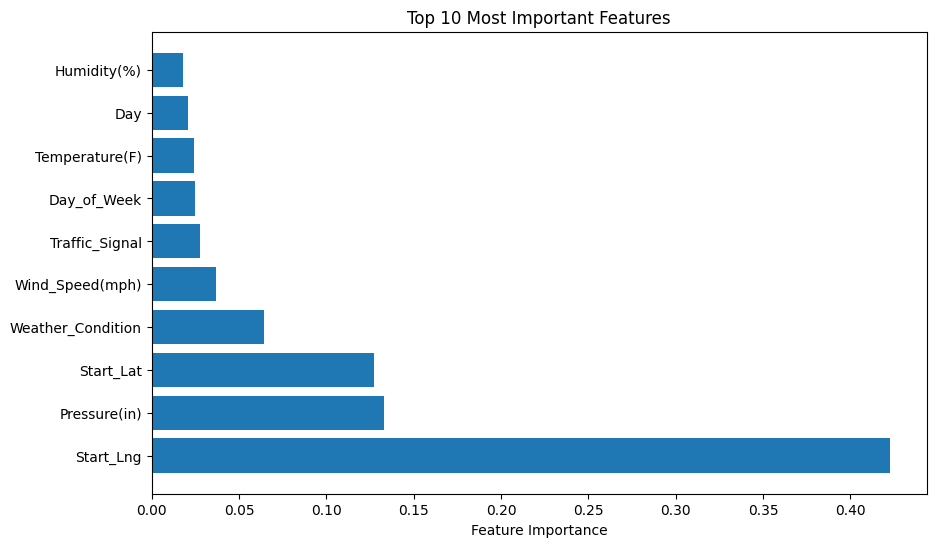

In [80]:
plt.figure(figsize=(10, 6))
plt.barh(np.array(x_train.columns)[sorted_idx][:10], feature_importances[sorted_idx][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.show()

We can see that the top 10 Essiential Feature of the Accidents

# Pickle the File

In [107]:
import pickle

In [108]:
with open('Ml_Task.pkl', 'wb') as file:
    pickle.dump(model, file)

# Recommendations on the research #
* improve Advanced algorithms like Lightgbm,Xgboost
* expand the Hyperparameter tuning and use RandomsearchCv with high entities which will take more time but gives us good accuries
* use cross-validation techniques for more balanced techniques
* If the data is Imbalanced use SMOTE Technique
* Deploy the model using the Mlops or Streamlit
* Automating the data pipeline